In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce

In [16]:
file1 = "Resources/Underlying Cause of Death, 1999_2018_Age.xlsx"
df = pd.read_excel(file1)


In [17]:
df.head()

,Notes,State,State Code,Age_Groups,Ten-Year Age Groups Code,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,< 1 year,1,1999.0,1999.0,606.0,58787,1030.8
1,NaN,Alabama,1.0,< 1 year,1,2000.0,2000.0,596.0,59101,1008.4
2,NaN,Alabama,1.0,< 1 year,1,2001.0,2001.0,567.0,61537,921.4
3,NaN,Alabama,1.0,< 1 year,1,2002.0,2002.0,539.0,58963,914.1
4,NaN,Alabama,1.0,< 1 year,1,2003.0,2003.0,519.0,58021,894.5


In [18]:
table=pd.pivot_table(df, values=['Deaths','Population'], index=['State','Year'], columns=['Age_Groups'], aggfunc=np.sum)
table

Deaths                                                  \
Age_Groups     1-4 years 15-24 years 25-34 years 35-44 years 45-54 years   
State   Year                                                               
Alabama 1999.0     121.0       752.0       893.0      1887.0      3157.0   
        2000.0      97.0       708.0       854.0      1836.0      3265.0   
        2001.0      98.0       706.0       851.0      1845.0      3495.0   
        2002.0     102.0       722.0       912.0      1806.0      3574.0   
        2003.0      96.0       698.0       878.0      1889.0      3738.0   
...                  ...         ...         ...         ...         ...   
Wyoming 2014.0      13.0        76.0       128.0       148.0       328.0   
        2015.0       NaN        80.0       137.0       171.0       316.0   
        2016.0      10.0        70.0       109.0       167.0       283.0   
        2017.0      11.0        63.0        97.0       153.0       277.0   
        2018.0       NaN        66.0        99.0       156.0       296.0   

                                                                         \
Age_Groups     5-14 years 55-64 years 65-74 years 75-84 years 85+ years   
State   Year                                                              
Alabama 1999.0      184.0      5041.0      8844.0     12472.0   10849.0   
        2000.0      138.0      5110.0      8992.0     12521.0   10944.0   
        2001.0      161.0      5127.0      8863.0     12400.0   11202.0   
        2002.0      150.0      5297.0      8582.0     12854.0   11528.0   
        2003.0      133.0      5611.0      8542.0     12992.0   11619.0   
...                   ...         ...         ...         ...       ...   
Wyoming 2014.0        NaN       648.0       862.0      1079.0    1327.0   
        2015.0       15.0       666.0       904.0      1120.0    1321.0   
        2016.0        NaN       677.0       952.0      1053.0    1355.0   
        2017.0        NaN       697.0       976.0      1098.0    1361.0   
        2018.0        NaN       664.0      1002.0      1258.0    1479.0   

                                    
Age_Groups     < 1 year Not Stated  
State   Year                        
Alabama 1999.0    606.0        NaN  
        2000.0    596.0        NaN  
        2001.0    567.0        NaN  
        2002.0    539.0        NaN  
        2003.0    519.0        NaN  
...                 ...        ...  
Wyoming 2014.0     49.0        NaN  
        2015.0     39.0        NaN  
        2016.0     37.0        NaN  
        2017.0     32.0        NaN  
        2018.0     35.0        NaN  

[1020 rows x 12 columns]

In [10]:
table.to_csv("Resources/table_age.csv", index=True)

In [11]:
df.isnull().sum()

Notes                       11215
State                          53
State Code                     53
Age_Groups                     53
Ten-Year Age Groups Code       53
Year                           53
Year Code                      53
Deaths                         53
Population                     53
Crude Rate                     53
dtype: int64

In [12]:
df.describe()

,State Code,Year,Year Code,Deaths
count,11215.000000,11215.000000,11215.000000,11215.000000
mean,28.835488,2008.465537,2008.465537,4508.746679
std,15.661832,5.770617,5.770617,8670.980760
min,1.000000,1999.000000,1999.000000,10.000000
25%,16.000000,2003.000000,2003.000000,208.000000
50%,29.000000,2008.000000,2008.000000,1047.000000
75%,42.000000,2013.000000,2013.000000,4700.500000
max,56.000000,2018.000000,2018.000000,91368.000000


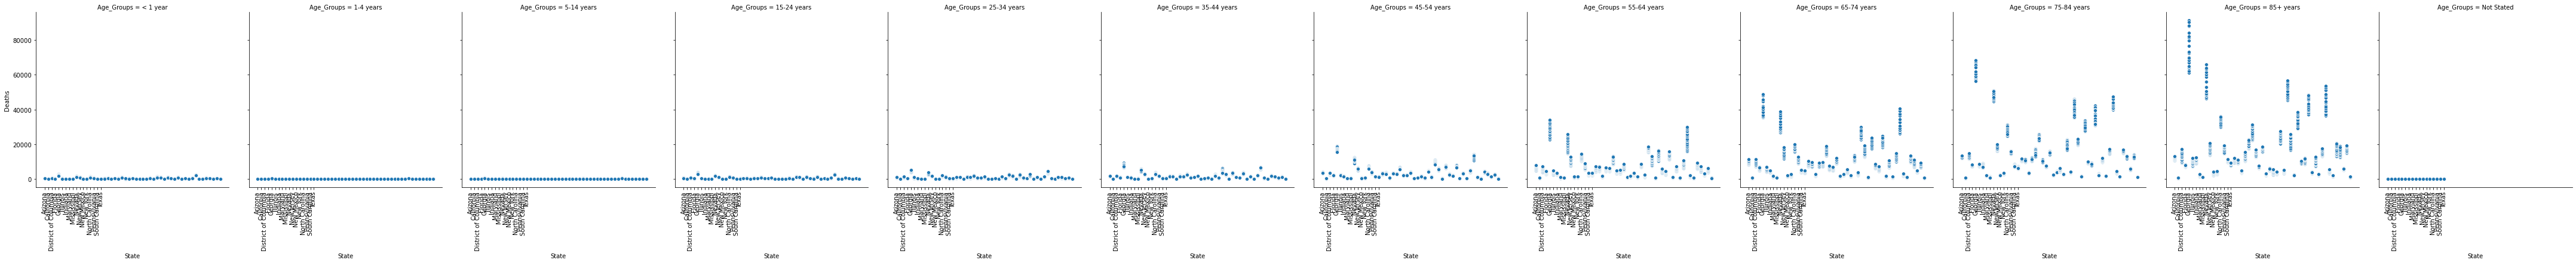

In [14]:
g=sns.relplot(x='State',y='Deaths', data=df, kind="scatter",col='Age_Groups')
g.set_xticklabels(rotation=90)

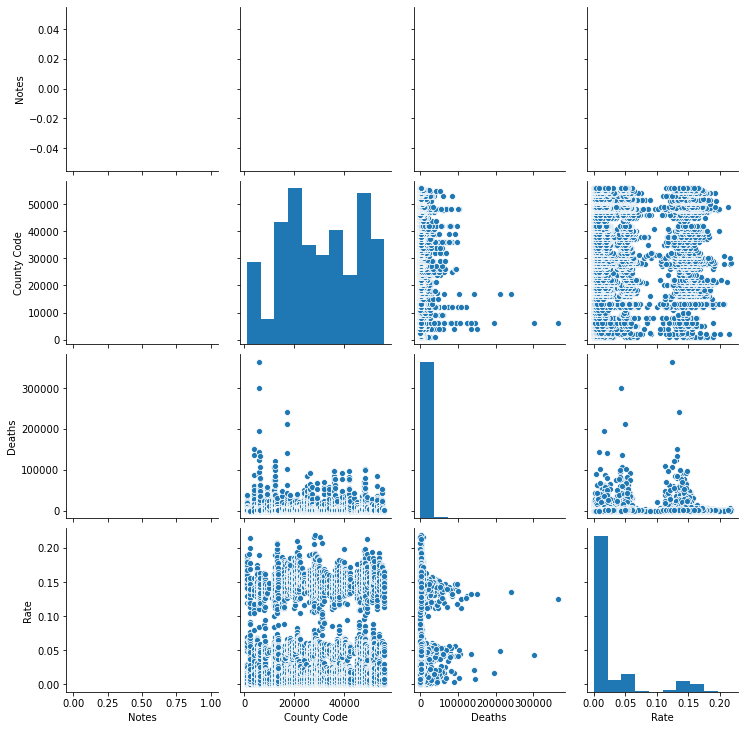

In [143]:
ax = sns.pairplot(df)

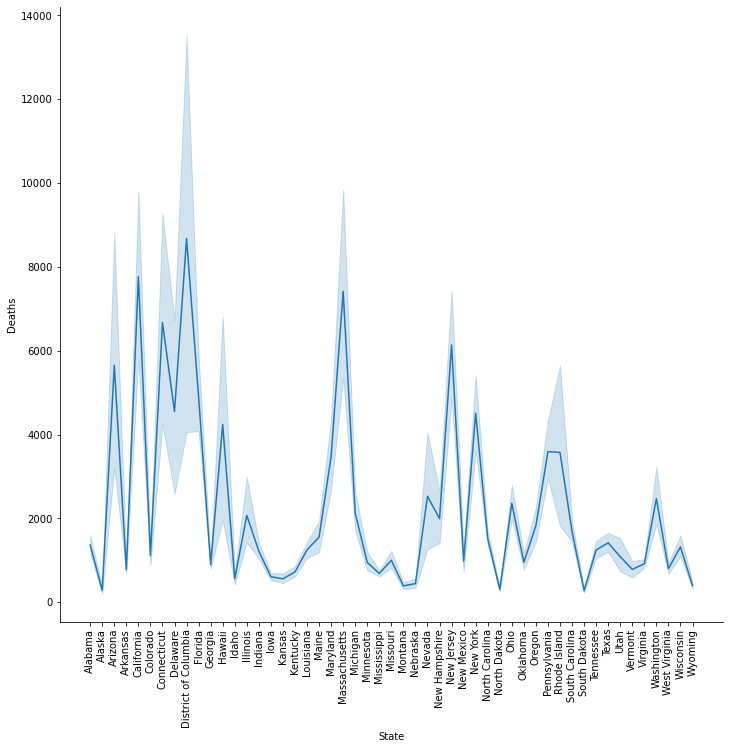

In [144]:
g= sns.relplot(x='State',y='Deaths', kind='line', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 10)
g.set_xticklabels(rotation=90)

C:\Users\sbatt\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


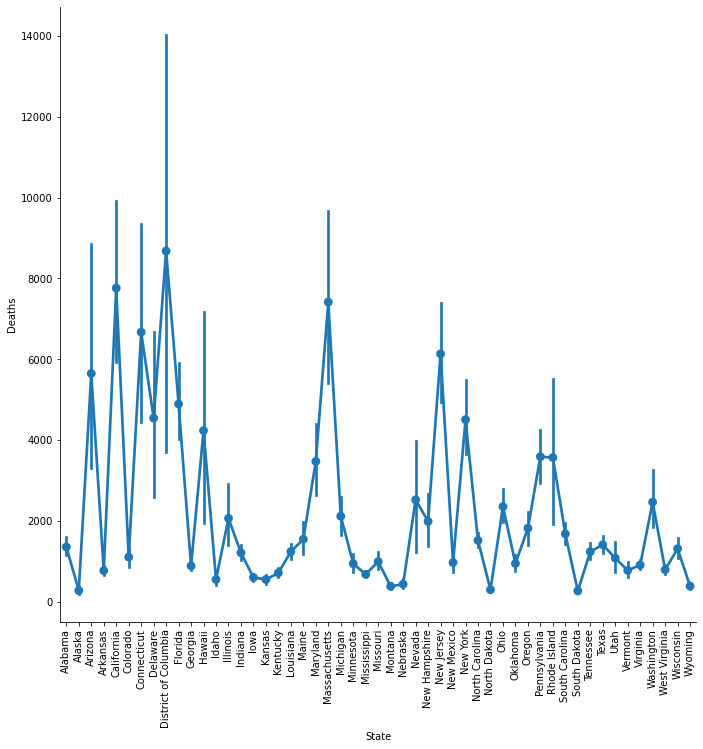

In [145]:
g= sns.factorplot(x='State',y='Deaths', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 10)
g.set_xticklabels(rotation=90)

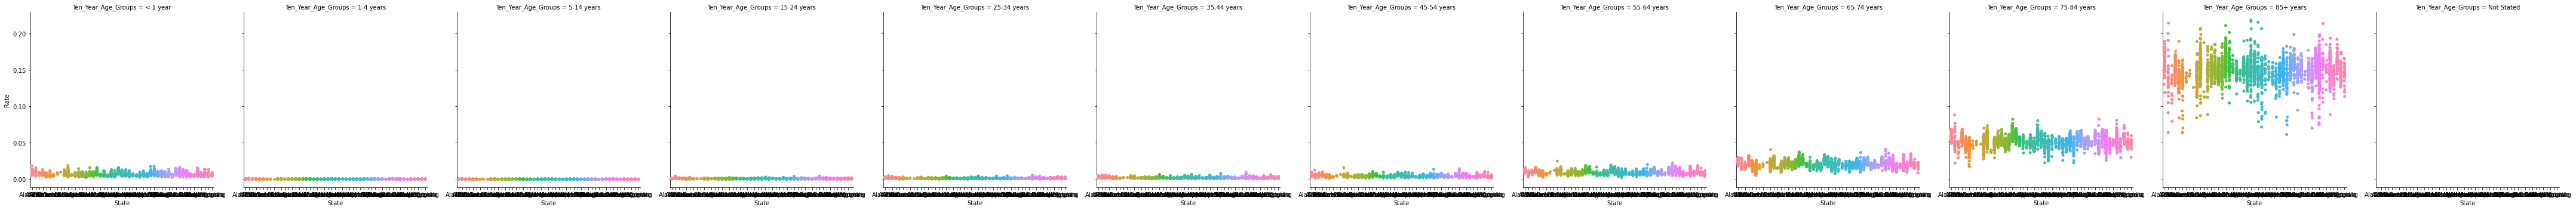

In [150]:
g= sns.catplot(x='State',y='Rate', data=df, col='Ten_Year_Age_Groups')
